### 1. Load data from file

In [0]:
import numpy as np

DATA_PATH = './data.txt'

# load data from file
data = np.genfromtxt(DATA_PATH, delimiter=',')

# separate features from labels
X_data = data[:, 0:-1]
Y_data = data[:, -1].reshape(-1, 1)

m = len(X_data)

### 2. Define functions for logistic regression



In [0]:
def logistic(theta, X):
  temp_x = np.concatenate((np.ones((m, 1)), X), axis=1)
  z = np.matmul(temp_x, theta.T)
  Y_hat = 1 / (1 + np.exp(-z))
  return Y_hat

def objective(Y_hat, Y):
  epsilon = 1e-8
  return (-1 / m) * np.sum(
      Y * np.log(Y_hat + epsilon) + (1 - Y) * np.log(1 - Y_hat + epsilon), axis=0
  )

def gradient(X, Y_hat, Y):
  temp_x = np.concatenate((np.ones((m, 1)), X), axis=1)
  return (1 / m) * np.matmul((Y_hat - Y).T, temp_x)

### 3. Learning with the gradient descent algorithm


In [0]:
theta = np.zeros((1, X_data.shape[1] + 1))
lr = 0.001
epoch_count = 20000000

history = {
    'theta': np.zeros((epoch_count, theta.shape[1])),
    'train_err': np.zeros(epoch_count)
}

for epoch in range(epoch_count):
  # calculate training error
  Y_hat = logistic(theta, X_data)
  train_err = objective(Y_hat, Y_data)

  # log history
  history['theta'][epoch] = np.squeeze(theta)
  history['train_err'][epoch] = train_err

  # gradient descent
  grad_theta = gradient(X_data, Y_hat, Y_data)
  theta -= lr * grad_theta

### 4. Plot the results


4-1. Training data

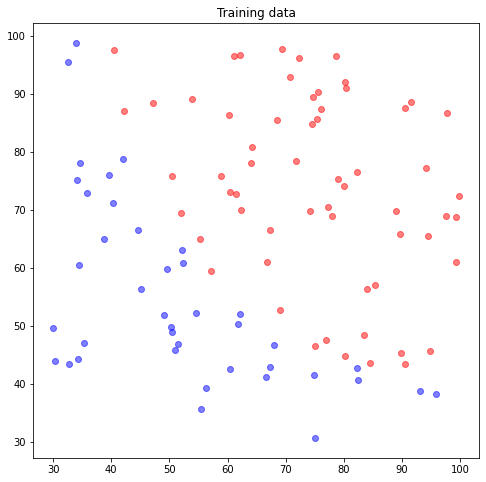

In [11]:
import matplotlib.pyplot as plt

epoch_tick = np.arange(epoch_count)

X_label0 = X_data[np.squeeze(Y_data) == 0]
X_label1 = X_data[np.squeeze(Y_data) == 1]

plt.figure(figsize=(8, 8))
plt.title('Training data')
plt.scatter(X_label0[:, 0], X_label0[:, 1], alpha=0.5, c='b')
plt.scatter(X_label1[:, 0], X_label1[:, 1], alpha=0.5, c='r')
plt.show()

4-2. Estimated parameters

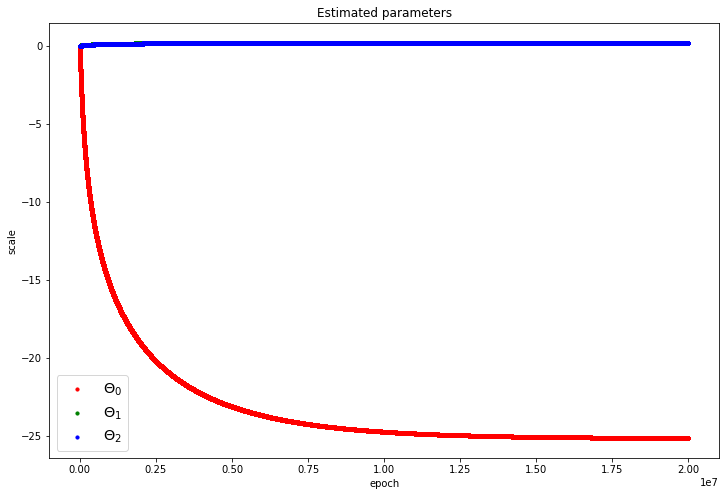

In [12]:
plt.figure(figsize=(12, 8))
plt.title('Estimated parameters')
plt.scatter(epoch_tick, history['theta'][:, 0], c='r', s=10)
plt.scatter(epoch_tick, history['theta'][:, 1], c='g', s=10)
plt.scatter(epoch_tick, history['theta'][:, 2], c='b', s=10)
plt.legend(['$\Theta_0$', '$\Theta_1$', '$\Theta_2$'], fontsize='x-large', loc='lower left')
plt.xlabel('epoch')
plt.ylabel('scale')
plt.show()

4-3. Training error

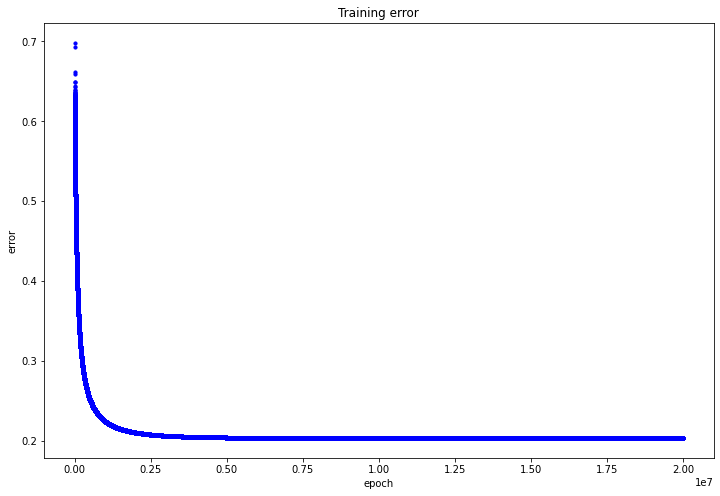

In [13]:
plt.figure(figsize=(12, 8))
plt.title('Training error')
plt.scatter(epoch_tick, history['train_err'], c='b', s=10)
plt.xlabel('epoch')
plt.ylabel('error')
plt.show()